In [ ]:
import pandas as pd
import io

csv_data = """OrderID,Timestamp,CustomerType,MealTime,DishName,Quantity,UnitPrice,TotalPrice
1001,2025-07-15 08:15:00,Regular,Breakfast,Veg Sandwich,2,50,100
1002,2025-07-15 13:10:00,New,Lunch,Butter Chicken,1,200,200
1003,2025-07-15 13:45:00,Regular,Lunch,Paneer Tikka,1,180,180
1004,2025-07-15 19:20:00,VIP,Dinner,Grilled Fish,2,300,600
1005,2025-07-16 08:30:00,New,Breakfast,Masala Dosa,1,60,60
1006,2025-07-16 13:00:00,Regular,Lunch,Veg Biryani,3,120,360
1007,2025-07-16 20:00:00,VIP,Dinner,Chicken Manchurian,2,250,500
1008,2025-07-17 13:30:00,Regular,Lunch,Butter Chicken,2,200,400
1009,2025-07-17 19:45:00,New,Dinner,Veg Noodles,1,100,100
1010,2025-07-17 09:00:00,Regular,Breakfast,Idli Sambar,2,40,80
"""

df_new = pd.read_csv(io.StringIO(csv_data))

display(df_new)

,OrderID,Timestamp,CustomerType,MealTime,DishName,Quantity,UnitPrice,TotalPrice
0,1001,2025-07-15 08:15:00,Regular,Breakfast,Veg Sandwich,2,50,100
1,1002,2025-07-15 13:10:00,New,Lunch,Butter Chicken,1,200,200
2,1003,2025-07-15 13:45:00,Regular,Lunch,Paneer Tikka,1,180,180
3,1004,2025-07-15 19:20:00,VIP,Dinner,Grilled Fish,2,300,600
4,1005,2025-07-16 08:30:00,New,Breakfast,Masala Dosa,1,60,60
5,1006,2025-07-16 13:00:00,Regular,Lunch,Veg Biryani,3,120,360
6,1007,2025-07-16 20:00:00,VIP,Dinner,Chicken Manchurian,2,250,500
7,1008,2025-07-17 13:30:00,Regular,Lunch,Butter Chicken,2,200,400
8,1009,2025-07-17 19:45:00,New,Dinner,Veg Noodles,1,100,100
9,1010,2025-07-17 09:00:00,Regular,Breakfast,Idli Sambar,2,40,80


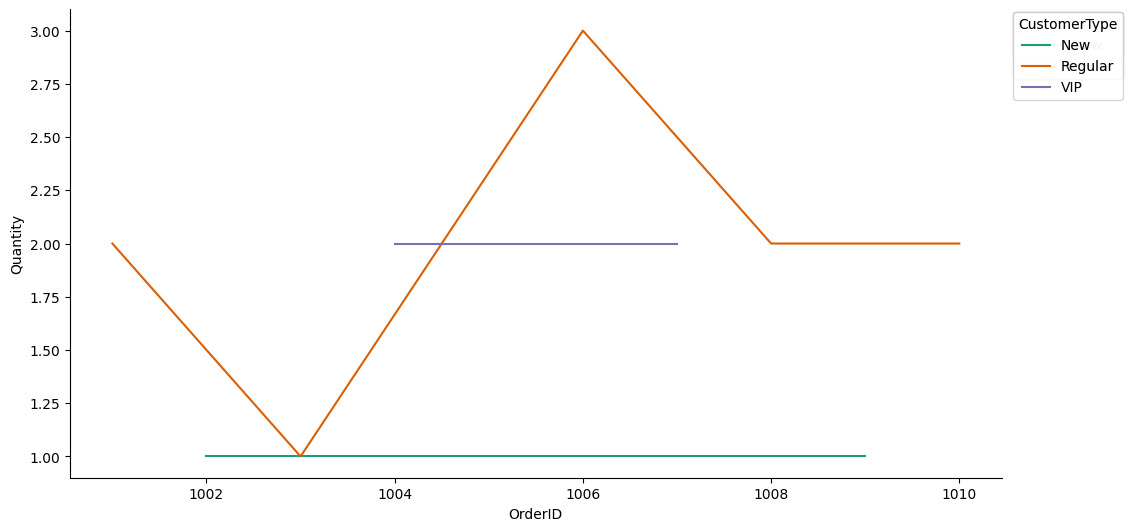

In [1]:
# @title OrderID vs Quantity

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import io

csv_data = """OrderID,Timestamp,CustomerType,MealTime,DishName,Quantity,UnitPrice,TotalPrice
1001,2025-07-15 08:15:00,Regular,Breakfast,Veg Sandwich,2,50,100
1002,2025-07-15 13:10:00,New,Lunch,Butter Chicken,1,200,200
1003,2025-07-15 13:45:00,Regular,Lunch,Paneer Tikka,1,180,180
1004,2025-07-15 19:20:00,VIP,Dinner,Grilled Fish,2,300,600
1005,2025-07-16 08:30:00,New,Breakfast,Masala Dosa,1,60,60
1006,2025-07-16 13:00:00,Regular,Lunch,Veg Biryani,3,120,360
1007,2025-07-16 20:00:00,VIP,Dinner,Chicken Manchurian,2,250,500
1008,2025-07-17 13:30:00,Regular,Lunch,Butter Chicken,2,200,400
1009,2025-07-17 19:45:00,New,Dinner,Veg Noodles,1,100,100
1010,2025-07-17 09:00:00,Regular,Breakfast,Idli Sambar,2,40,80
"""

df_new = pd.read_csv(io.StringIO(csv_data))

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OrderID']
  ys = series['Quantity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_new.sort_values('OrderID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CustomerType')):
  _plot_series(series, series_name, i)
  fig.legend(title='CustomerType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OrderID')
_ = plt.ylabel('Quantity')

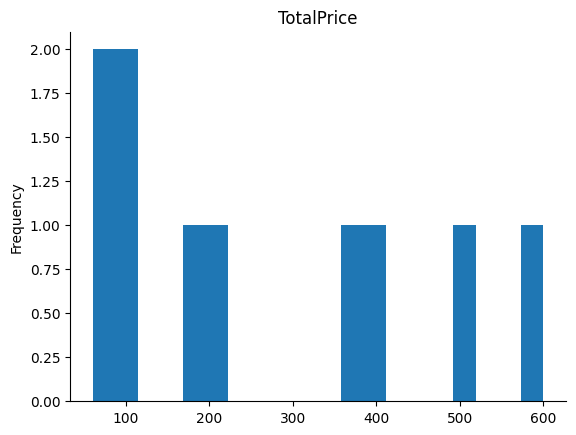

In [ ]:
# @title TotalPrice

from matplotlib import pyplot as plt
df_new['TotalPrice'].plot(kind='hist', bins=20, title='TotalPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

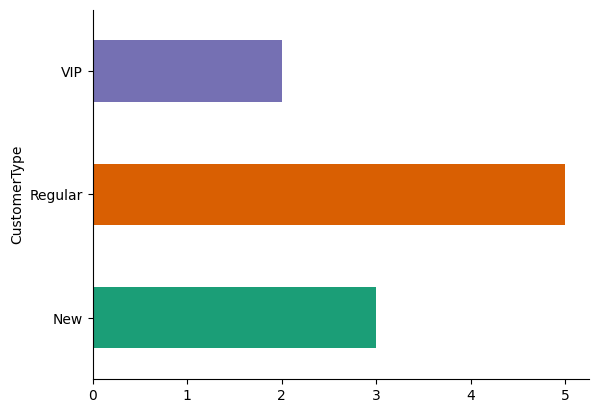

In [ ]:
# @title CustomerType

from matplotlib import pyplot as plt
import seaborn as sns
df_new.groupby('CustomerType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)